# Getting started with DataJoint

Congratulations! If you are reading this, you have successfully connected to the first DataJoint tutorial notebook: `01-DataJoint Basics`. 

This tutorial will walk you through the major concepts and steps to use DataJoint: 

- Essential concepts and setup
    - Data pipelines
        - Concept
        - Practical examples
    - Schemas and tables
        - Concept
        - Practical examples
    - Basic relational operators
    - Create tables with dependencies
    - Querying data
- Summary

## Essential concepts and setup


Both interactive and local environments come with the latest DataJoint Python package pre-installed, along with many other popular [Python](https://www.python.org/) packages for scientific computations such as [NumPy](http://www.numpy.org/), [SciPy](https://www.scipy.org/), and [Matplotlib](https://matplotlib.org/). 

Like any other package, to start using [DataJoint](https://datajoint.com/docs/), you must first import the package  `datajoint`. The convention is to alias the package to `dj`.

*NOTE: Run code cells by clicking on the left-top corner bottom of the cell or using Ctrl+Enter shortcut.*

In [1]:
import datajoint as dj

### Data pipelines


##### Concept


>* A data pipeline is a collection of processes and steps for organizing the data and computations. Data pipelines perform complex data acquisition sequences, processing, and analysis with integrated storage at each step. These steps may be thought of as nodes in a directed graph that defines their order of execution.

>* Nodes in this graph are represented as database **tables**. Examples of such tables include "Subject", "Session", "Implantation", "Experimenter", "Equipment", but also "OptoWaveform", "OptoStimParams", or "Neuronal spikes".  

>* The data pipeline is formed by making these tables interdependent (as the nodes are connected in a network). A **dependency** is a situation where a step of the data pipeline is dependent on a result from a sequentially previous step before it can complete its execution. A dependency graph forms an entire cohesive data pipeline. 

A [DataJoint pipeline](https://datajoint.com/docs/core/datajoint-python/0.14/concepts/terminology/) contains database table definitions, dependencies, and associated computations, together with the transformations underlying a DataJoint workflow. 

The following figure is an example pipeline using [DataJoint Element for Multi-photon Calcium Imaging](https://datajoint.com/docs/elements/element-calcium-imaging/):

![pipeline](../images/pipeline-calcium-imaging.svg)

A **well-designed data pipeline**: 
- Collects, organizes, and stores **every relevant piece of information during the scientific research.**
- Integrates, processes, and connects these pieces of information through **several steps**.
- Analyzes and transforms the input data into **valuable insights for the research**, bringing together logical clarity to the experiments.


##### Practical examples

The practical examples that will be used in the next tutorials will allow you to design and compute a data pipeline for a scientific project of two experiments on rodents: 
- Single-electrode recording
- Calcium imaging recording

Let's start with a brief description of this project's context:

> * Your lab houses many mice, and a unique ID identifies each mouse. You also want to keep track of other information about each mouse, such as their date of birth and gender.
> * As a hard-working neuroscientist, you perform experiments every day, sometimes working with more than one mouse daily. However, a mouse undergoes at most one recording session on any given day.
> * For each experimental session, you want to record what mouse you worked with and when you performed the experiment. You also want to keep track of other helpful information, such as the experimental setup you used.  

> * In a session of electrophysiology:
>> * You record electrical activity from a single neuron. You use recording equipment that produces separate data files for each neuron you record.
>> * Neuron's activities are recorded as raw traces. Neuron's spikes need to be detected for further analysis to be perform.

> * In a session of calcium imaging:
>> * You scan a brain region containing several neurons. You use recording equipment that produces separate data files for each scan you performed.
>> * You need to segment the frames and get the regions of interest (ROIs), and save a mask for each ROI
>> * In addition, you need to extract the trace from each segmented ROI

The design of a data pipeline starts by identifying the **entities** or **tables** in your research project. Common entities include experimental subjects (e.g. mouse), recording sessions, and two-photon scans.

Let's revisit the project description, this time paying special attention to **what** (e.g. nouns or entities) about your experiment. Here, some particular entities are highlighted.

> * Your lab houses many **mice**, and a unique ID identifies each mouse. You also want to keep track of other information about each mouse, such as their date of birth and gender.
> * As a hard-working neuroscientist, you perform experiments every day, sometimes working with more than one mouse daily. However, a mouse undergoes at most one recording session on any given day.
> * For each **experimental session**, you want to record what mouse you worked with and when you experimented. You also want to keep track of other helpful information, such as the experimental setup you worked on.  

> * In a session of electrophysiology:
>> * You record electrical activity from a **single neuron**. You use recording equipment that produces separate data files for each neuron you record.
>> * Neuron's activities are recorded as raw traces. **Neuron's spikes** need to be detected for further analysis to be perform.

> * In a session of calcium imaging:
>> * You **scan** a brain region containing several neurons. You use recording equipment that produces separate data files for each scan you performed.
>> * You need to segment the frames and get the **regions of interest (ROIs)**, and save a mask for each ROI
>> * In addition, you need to extract the **trace** from each segmented ROI

Just by going through the description, we can start to identify **entities** that needs to be stored and represented in our data pipeline:

>* Mouse
>* Experimental session

For Ephys:

>* Neuron
>* Spikes

For Calcium Imaging:

>* Scan
>* Regions of interest (ROI)
>* Trace

In the next section, you will learn to design the tables and manipulate the data for `Mouse` and `Experimental sessions`. The rest of the pipeline (`Ephys` and `Calcium Imaging` will be addressed in the subsequent tutorials.

### Schemas and tables

##### Concepts

In a data pipeline, we represent these **entities** as **tables**. Different *kinds* of entities become distinct tables, and each table row is a single example (instance) of the entity's category. 

For example, if we have a `Mouse` table, each row in the mouse table represents a single mouse. 

It is essential to think about what information will **uniquely identify** each entry. 

In this case, the information that uniquely identifies the `Mouse` table is their **mouse IDs** - a unique ID number assigned to each animal in the lab. This attribute is named the **primary key** of the table.

| Mouse_ID (*Primary key attribute*)|
|:--------: |                         
| 11234     |
| 11432     |

After some thought, we might conclude that each mouse can be uniquely identified by knowing its **mouse ID** - a unique ID number assigned to each mouse in the lab. 

The mouse ID is then a column in the table or an **attribute** that can be used to **uniquely identify** each mouse. 

Such an attribute is called the **primary key** of the table: the subset of table attributes uniquely identifying each entity in the table. The **secondary attribute** refers to any field in a table, not in the primary key.

| Mouse_ID (*Primary key attribute*) 
|:--------:|  
| 11234      (*Secondary attribute*)
| 11432      (*Secondary attribute*)

Once we have successfully identified the table's primary key, we can now think about what other columns, or **non-primary key attributes** - additional information **about each entry in the table that need to be stored as well**.

For the case of `Mouse`, what other information about the mouse might you want to store? 

Based on the project description, we would probably want to store information such as the mouse's **date of birth** (DOB) and **sex**.

| Mouse_ID | DOB        | sex |
|:--------:|------------|--------|
| 11234    | 2017-11-17 | M      |
| 11432    | 2018-03-04 | F      |

Now that we have an idea of how to represent information about the mouse, let's create the table using **DataJoint**!

##### Practical example

##### Schema

Every table lives inside a schema - a logical collection of one or more tables in your pipeline. Your final pipeline will consist of many tables spread across one or more schemas. Let's go ahead and create the first schema to house our `Mouse` table using DataJoint.

We create the schema using `dj.schema()` function, passing in the schema's name. For this tutorial, we create a schema called `tutorial`.

In [2]:
schema = dj.schema("tutorial")

[2025-01-02 15:29:47,940][INFO]: Connecting root@db:3306
[2025-01-02 15:29:47,952][INFO]: Connected root@db:3306


Now that we have a schema to place our table into let's go ahead and define our first table. 

##### Table

In DataJoint, you define each table as a `class`, and provide the table definition (e.g., attribute definitions) as the `definition` static string property. The class will inherit from the `dj.Manual` class provided by DataJoint (more on this later).

In [3]:
@schema
class Mouse(dj.Manual):
    definition = """
    # Experimental animals
    mouse_id             : int                          # Unique animal ID
    ---
    dob=null             : date                         # date of birth
    sex="unknown"        : enum('M','F','unknown')      # sex
    """

Let's take a look at our brand-new table

In [4]:
Mouse()

*mouse_id    dob     sex    
+----------+ +-----+ +-----+

 (Total: 0)

### Basic relational operators

##### Insert operators

The table was successfully defined, but with content, the table will be more interesting. Let's go ahead and **insert some mouse information** into the table, one at a time, using the `insert1` method.

Let's use the `insert1` method to enter the following information into the table:
* mouse_id: 0
* date of birth: 2017-03-01
* sex: male

In [5]:
Mouse.insert1((0, "2017-03-01", "M"))

In [6]:
Mouse()

*mouse_id    dob            sex    
+----------+ +------------+ +-----+
0            2017-03-01     M      
 (Total: 1)

You can also `insert1` as a dictionary:

In [7]:
data = {"mouse_id": 100, "dob": "2017-05-12", "sex": "F"}

In [8]:
Mouse.insert1(data)

In [9]:
Mouse()

*mouse_id    dob            sex    
+----------+ +------------+ +-----+
0            2017-03-01     M      
100          2017-05-12     F      
 (Total: 2)

We can also insert multiple **mice** together using the `insert` method, passing in a list of data:

In [10]:
data = [(1, "2016-11-19", "M"), (2, "2016-11-20", "unknown"), (5, "2016-12-25", "F")]

In [11]:
Mouse.insert(data)

Of course, you can `insert` a list of dictionaries:

In [12]:
data = [
    {"mouse_id": 10, "dob": "2017-01-01", "sex": "F"},
    {"mouse_id": 11, "dob": "2017-01-03", "sex": "F"},
]

# insert them all
Mouse.insert(data)

In [13]:
Mouse()

*mouse_id    dob            sex        
+----------+ +------------+ +---------+
0            2017-03-01     M          
1            2016-11-19     M          
2            2016-11-20     unknown    
5            2016-12-25     F          
10           2017-01-01     F          
11           2017-01-03     F          
100          2017-05-12     F          
 (Total: 7)

##### Data integrity

DataJoint checks for data integrity and ensures you don't insert a duplicate by mistake. Let's try inserting another mouse with `mouse_id: 0` and see what happens!

*Note that the following code cell is intended to give an error code.* 

In [14]:
Mouse.insert1(
    {
        "mouse_id": 0,
        "dob": "2018-01-01",
        "sex": "M",
    }
)

DuplicateError: ("Duplicate entry '0' for key 'mouse.PRIMARY'", 'To ignore duplicate entries in insert, set skip_duplicates=True')

Let's insert a few more mice into your table before moving on:

In [15]:
data = [
    {"mouse_id": 12, "dob": "2017-03-21", "sex": "F"},
    {"mouse_id": 18, "dob": "2017-05-01", "sex": "F"},
    {"mouse_id": 19, "dob": "2018-07-21", "sex": "M"},
    {"mouse_id": 22, "dob": "2019-12-15", "sex": "F"},
    {"mouse_id": 34, "dob": "2018-09-22", "sex": "M"},
]

# insert them all
Mouse.insert(data)

In [18]:
Mouse()

*mouse_id    dob            sex        
+----------+ +------------+ +---------+
0            2017-03-01     M          
1            2016-11-19     M          
2            2016-11-20     unknown    
5            2016-12-25     F          
10           2017-01-01     F          
11           2017-01-03     F          
12           2017-03-21     F          
18           2017-05-01     F          
19           2018-07-21     M          
22           2019-12-15     F          
34           2018-09-22     M          
84           2024-09-22     M          
   ...
 (Total: 13)

In [17]:
# ENTER YOUR CODE - Insert more mice
Mouse.insert1({"mouse_id": 84, "dob": "2024-09-22", "sex": "M"})

### Create tables with dependencies

Congratulations! We have successfully created your first table! We are ready to tackle and include other **entities** into the project's data pipeline. 

Let's now have a look at representing an `experimental session`.

As with `mouse`, we should consider **what information (i.e., attributes) is needed to identify an `experimental session`** uniquely. Here is the relevant section of the project description:

> * As a hard-working neuroscientist, you perform experiments daily, sometimes working with **more than one mouse in a day**. However, on any given day, **a mouse undergoes at most one recording session**.
> * For each **experimental session**, you want to record **what mouse you worked with** and **when you performed the experiment**. You also want to keep track of other helpful information, such as the **experimental setup** you worked on.  

Based on the above, it seems that you need to know these two data to uniquely identify a single experimental session:

* the date of the session
* the mouse you recorded from in that session

Note that, to uniquely identify an experimental session (or simply a `Session`), we need to know the mouse that the session was about. In other words, a session cannot existing without a corresponding mouse! 

With **mouse** already represented as a table in our pipeline, we say that the session **depends on** the mouse! We could graphically represent this in an **entity relationship diagram (ERD)** by drawing the line between two tables, with the one below (**session**) depending on the one above (**mouse**).

Thus, we will need both the **mouse** and the new attribute **session_date** to identify a single `session` uniquely. 

Remember that a **mouse** is uniquely identified by its primary key - **mouse_id**. In DataJoint, you can declare that **session** depends on the mouse, and DataJoint will automatically include the mouse's primary key (`mouse_id`) as part of the session's primary key, alongside any additional attribute(s) you specify.

In [19]:
@schema
class Session(dj.Manual):
    definition = """
    # Experiment session
    -> Mouse
    session_date               : date                         # date
    ---
    experiment_setup           : int                          # experiment setup ID
    experimenter               : varchar(100)                 # experimenter name
    data_path=''               : varchar(255)                 #
    """

You can generate something similar to an entity relationship diagram (ERD) on the fly by calling `dj.Diagram` with the schema object. Many of the symbols and features are the same as the ERD standard.

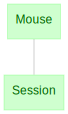

In [20]:
dj.Diagram(schema)

Let's insert a few sessions manually:

In [21]:
data = {
    "mouse_id": 0,
    "session_date": "2017-05-15",
    "experiment_setup": 0,
    "experimenter": "Edgar Y. Walker",
}

Session.insert1(data)

In [22]:
Session()

*mouse_id    *session_date  experiment_set experimenter   data_path    
+----------+ +------------+ +------------+ +------------+ +-----------+
0            2017-05-15     0              Edgar Y. Walke              
 (Total: 1)

Let's insert another session for `mouse_id = 0` but on a different date:

In [23]:
data = {
    "mouse_id": 0,
    "session_date": "2018-01-15",
    "experiment_setup": 100,
    "experimenter": "Jacob Reimer",
}

Session.insert1(data)

Session()

*mouse_id    *session_date  experiment_set experimenter   data_path    
+----------+ +------------+ +------------+ +------------+ +-----------+
0            2017-05-15     0              Edgar Y. Walke              
0            2018-01-15     100            Jacob Reimer                
 (Total: 2)

And another session done on the same date but on a different mouse:

In [24]:
data = {
    "mouse_id": 18,
    "session_date": "2018-01-15",
    "experiment_setup": 101,
    "experimenter": "Jacob Reimer",
}

# insert them all
Session.insert1(data)

In [25]:
Session()

*mouse_id    *session_date  experiment_set experimenter   data_path    
+----------+ +------------+ +------------+ +------------+ +-----------+
0            2017-05-15     0              Edgar Y. Walke              
0            2018-01-15     100            Jacob Reimer                
18           2018-01-15     101            Jacob Reimer                
 (Total: 3)

What happens if we try to insert a session for a mouse that doesn't exist?:

In [26]:
bad_data = {
    "mouse_id": 9999,  # this mouse doesn't exist!
    "session_date": "2017-05-15",
    "experiment_setup": 0,
    "experimenter": "Edgar Y. Walker",
}

*Note: the following code line is intended to give an error code:*

In [27]:
Session.insert1(bad_data)

IntegrityError: Cannot add or update a child row: a foreign key constraint fails (`tutorial`.`session`, CONSTRAINT `session_ibfk_1` FOREIGN KEY (`mouse_id`) REFERENCES `mouse` (`mouse_id`) ON DELETE RESTRICT ON UPDATE CASCADE)

### Querying data

Oftentimes, you don't need to use all of the data but rather work with **a subset of entities** matching specific criteria. Rather than fetching the whole data and writing your parser, narrowing your data to the subset before fetching is far more efficient.

For this, DataJoint offers a very powerful yet intuitive **querying syntax** that lets you select the data you want before you fetch it.

It is also critical to note that the result of any DataJoint query represents a valid entity.

We will introduce significant types of queries used in DataJoint:
* 1. Restriction (`&`) and negative restriction (`-`): filter the data with certain conditions
* 2. Join (`*`): bring fields from different tables together
* 3. Projection (`.proj()`): focus on a subset of attributes
* 4. Fetch (`.fetch()`): pull the data from the database
* 5. Deletion (`.delete()`): delete entries and their dependencies
* 6. Drop (`.drop()`): drop the table from the schema

### 1. Restrictions (`&` or `-`): filter the data with certain conditions

The **restriction** operation, `&`, allows you to specify the criteria to narrow down the table on the left.

##### Exact match

Mouse with `ID = 0`:

In [28]:
Mouse & "mouse_id = 0"

*mouse_id    dob            sex    
+----------+ +------------+ +-----+
0            2017-03-01     M      
 (Total: 1)

All the male (`M`) mice:

In [29]:
Mouse & 'sex = "M"'

*mouse_id    dob            sex    
+----------+ +------------+ +-----+
0            2017-03-01     M      
1            2016-11-19     M      
19           2018-07-21     M      
34           2018-09-22     M      
84           2024-09-22     M      
 (Total: 5)

All the female (`F`) mice:

In [30]:
Mouse & 'sex = "F"'

*mouse_id    dob            sex    
+----------+ +------------+ +-----+
5            2016-12-25     F      
10           2017-01-01     F      
11           2017-01-03     F      
12           2017-03-21     F      
18           2017-05-01     F      
22           2019-12-15     F      
100          2017-05-12     F      
 (Total: 7)

We can also use a dictionary as a restrictor, with one field or multiple fields:

In [32]:
Mouse & 'mouse_id=5'

*mouse_id    dob            sex    
+----------+ +------------+ +-----+
5            2016-12-25     F      
 (Total: 1)

In [31]:
Mouse & dict(mouse_id=5)

*mouse_id    dob            sex    
+----------+ +------------+ +-----+
5            2016-12-25     F      
 (Total: 1)

### Inequality

You can also use inequality in your query to match based on numerical values.

Mouse that is born `after 2017-01-01`:

In [33]:
Mouse & 'dob > "2017-01-01"'

*mouse_id    dob            sex    
+----------+ +------------+ +-----+
0            2017-03-01     M      
11           2017-01-03     F      
12           2017-03-21     F      
18           2017-05-01     F      
19           2018-07-21     M      
22           2019-12-15     F      
34           2018-09-22     M      
84           2024-09-22     M      
100          2017-05-12     F      
 (Total: 9)

Mouse that is born within a range of dates:

In [34]:
Mouse & 'dob between "2017-03-01" and "2017-08-23"'

*mouse_id    dob            sex    
+----------+ +------------+ +-----+
0            2017-03-01     M      
12           2017-03-21     F      
18           2017-05-01     F      
100          2017-05-12     F      
 (Total: 4)

Mice that are `not male`:

In [35]:
Mouse & 'sex != "M"'

*mouse_id    dob            sex        
+----------+ +------------+ +---------+
2            2016-11-20     unknown    
5            2016-12-25     F          
10           2017-01-01     F          
11           2017-01-03     F          
12           2017-03-21     F          
18           2017-05-01     F          
22           2019-12-15     F          
100          2017-05-12     F          
 (Total: 8)

You can easily combine multiple restrictions to narrow the entities based on various attributes.

Let's find all mice that `are not male` and born `after 2017-01-01`:

In [36]:
Mouse & 'sex != "M"' & 'dob > "2017-01-01"'

*mouse_id    dob            sex    
+----------+ +------------+ +-----+
11           2017-01-03     F      
12           2017-03-21     F      
18           2017-05-01     F      
22           2019-12-15     F      
100          2017-05-12     F      
 (Total: 5)

In [37]:
Mouse & 'sex != "M" and dob > "2017-01-01"'

*mouse_id    dob            sex    
+----------+ +------------+ +-----+
11           2017-01-03     F      
12           2017-03-21     F      
18           2017-05-01     F      
22           2019-12-15     F      
100          2017-05-12     F      
 (Total: 5)

The result of one query can be used in another query! Let's first find `all the female mice` and `store the result`:

In [38]:
female_mice = Mouse & 'sex = "F"'
female_mice

*mouse_id    dob            sex    
+----------+ +------------+ +-----+
5            2016-12-25     F      
10           2017-01-01     F      
11           2017-01-03     F      
12           2017-03-21     F      
18           2017-05-01     F      
22           2019-12-15     F      
100          2017-05-12     F      
 (Total: 7)

It's your turn! Find and store the mice with a `mouse_id > 10`:

In [39]:
# ENTER YOUR CODE
Mouse & 'mouse_id > 10'

*mouse_id    dob            sex    
+----------+ +------------+ +-----+
11           2017-01-03     F      
12           2017-03-21     F      
18           2017-05-01     F      
19           2018-07-21     M      
22           2019-12-15     F      
34           2018-09-22     M      
84           2024-09-22     M      
100          2017-05-12     F      
 (Total: 8)

In Computer Science and Math lingo, DataJoint operations are said to **satisfy closure property**. Practically speaking, this means that the result of a query can immediately be used in another query, allowing you to build more complex queries from simpler ones. 

### Restriction operator (`&`): all entities from one table for which there exist a matching entity in other table

Note that when restricting, for example, table A with table B (written A & B), the two tables must have common attributes (join-compatible). 

To select all the `mice` that have a `session`:

In [40]:
Mouse & Session

*mouse_id    dob            sex    
+----------+ +------------+ +-----+
0            2017-03-01     M      
18           2017-05-01     F      
 (Total: 2)

All the above queries can be combined, for example, based on the `male mice` that are in a `session`:

In [41]:
Mouse & Session & 'sex = "M"'

*mouse_id    dob            sex    
+----------+ +------------+ +-----+
0            2017-03-01     M      
 (Total: 1)

Another example of how to select the `mice` that participated in an `experimental session` done `on or before 2017-05-19`:

In [42]:
Mouse & (Session & 'session_date <= "2017-05-19"')

*mouse_id    dob            sex    
+----------+ +------------+ +-----+
0            2017-03-01     M      
 (Total: 1)

### Negative restriction (`-`): subset of entities from one table for which there are no matching entities in other table

All the `mice` that do `not have any session`:

In [43]:
Mouse - Session

*mouse_id    dob            sex        
+----------+ +------------+ +---------+
1            2016-11-19     M          
2            2016-11-20     unknown    
5            2016-12-25     F          
10           2017-01-01     F          
11           2017-01-03     F          
12           2017-03-21     F          
19           2018-07-21     M          
22           2019-12-15     F          
34           2018-09-22     M          
84           2024-09-22     M          
100          2017-05-12     F          
 (Total: 11)

It's your turn! Find and store the male mice that do not have any session:

In [44]:
# ENTER YOUR CODE
Mouse - Session & 'sex = "M"'

*mouse_id    dob            sex    
+----------+ +------------+ +-----+
1            2016-11-19     M      
19           2018-07-21     M      
34           2018-09-22     M      
84           2024-09-22     M      
 (Total: 4)

### 2. Join (`*`): bring fields from different tables together

Sometimes you want to view and query information simultaneously from multiple tables combined. You can do this using the join `*` operator.

The Join operator works as follows:

1. Match the common field(s) of the primary keys in the two tables
2. Do a combination of the non-matched part of the primary key
3. List out the secondary attributes for each combination
4. If two tables have secondary attributes that share a same name, it will throw an error. To join, we need to rename that attribute for at least one of the tables.

In [45]:
# looking at the combination of mouse and session
Mouse * Session

*mouse_id    *session_date  dob            sex     experiment_set experimenter   data_path    
+----------+ +------------+ +------------+ +-----+ +------------+ +------------+ +-----------+
0            2017-05-15     2017-03-01     M       0              Edgar Y. Walke              
0            2018-01-15     2017-03-01     M       100            Jacob Reimer                
18           2018-01-15     2017-05-01     F       101            Jacob Reimer                
 (Total: 3)

Each row represents a unique (and valid!) combination of a mouse and a session.

The combined table can be queried using any of the attributes (columns) present in the joined tables:

In [46]:
# Find 'experimenter = "Jacob Reimer"' and 'sex = "M"'
Mouse * Session & 'experimenter = "Jacob Reimer"' & 'sex = "M"'

*mouse_id    *session_date  dob            sex     experiment_set experimenter   data_path    
+----------+ +------------+ +------------+ +-----+ +------------+ +------------+ +-----------+
0            2018-01-15     2017-03-01     M       100            Jacob Reimer                
 (Total: 1)

In [47]:
Mouse * Session & 'session_date > "2017-05-19"'

*mouse_id    *session_date  dob            sex     experiment_set experimenter   data_path    
+----------+ +------------+ +------------+ +-----+ +------------+ +------------+ +-----------+
0            2018-01-15     2017-03-01     M       100            Jacob Reimer                
18           2018-01-15     2017-05-01     F       101            Jacob Reimer                
 (Total: 2)

### 3. Projection (`.proj()`): focus on attributes of interest
Besides restriction (`&`) and join (`*`) operations, DataJoint offers another type of operation: projection (`.proj()`). Projection is used to select attributes (columns) from a table, rename them, or create new calculated attributes. 

From the **Mouse** table, suppose we want to focus only on the `sex` attribute and ignore the others. This can be done as:

In [48]:
Mouse.proj("sex")

*mouse_id    sex        
+----------+ +---------+
0            M          
1            M          
2            unknown    
5            F          
10           F          
11           F          
12           F          
18           F          
19           M          
22           F          
34           M          
84           M          
   ...
 (Total: 13)

Note that `.proj()` will always retain all attributes that are part of the primary key.

### Rename attribute with proj()
Say we want to rename the existing attribute `dob` of the `Mouse` table to `date_of_birth`. This can be done using `.proj()`:

In [49]:
Mouse.proj(date_of_birth="dob")

*mouse_id    date_of_birth 
+----------+ +------------+
0            2017-03-01    
1            2016-11-19    
2            2016-11-20    
5            2016-12-25    
10           2017-01-01    
11           2017-01-03    
12           2017-03-21    
18           2017-05-01    
19           2018-07-21    
22           2019-12-15    
34           2018-09-22    
84           2024-09-22    
   ...
 (Total: 13)

### Perform simple computations with proj()
Projection is perhaps most useful to perform simple computations on the attributes, especially on attributes from multiple tables, by using it in conjunction with the join (`*`) operation.

In [50]:
(Mouse * Session).proj(age="datediff(session_date, dob)")

*mouse_id    *session_date  age    
+----------+ +------------+ +-----+
0            2017-05-15     75     
0            2018-01-15     320    
18           2018-01-15     259    
 (Total: 3)

Note: As you can see, the projection results keep the primary attributes from the `Mouse * Session` joining operation while removing all other non-primary attributes. To keep all the other attributes, you can use the `...` syntax.

In [51]:
(Mouse * Session).proj(..., age="datediff(session_date, dob)")

*mouse_id    *session_date  dob            sex     experiment_set experimenter   data_path     age    
+----------+ +------------+ +------------+ +-----+ +------------+ +------------+ +-----------+ +-----+
0            2017-05-15     2017-03-01     M       0              Edgar Y. Walke               75     
0            2018-01-15     2017-03-01     M       100            Jacob Reimer                 320    
18           2018-01-15     2017-05-01     F       101            Jacob Reimer                 259    
 (Total: 3)

### 4. Fetch (`.fetch()`): pull the data from the database

Once you have narrowed down to the entities you want, you can fetch the query results just by calling fetch on it!

### Fetch one or multiple entries: `fetch()`

All the `male mice`:

In [52]:
male_mouse = Mouse & 'sex = "M"'
male_mouse

*mouse_id    dob            sex    
+----------+ +------------+ +-----+
0            2017-03-01     M      
1            2016-11-19     M      
19           2018-07-21     M      
34           2018-09-22     M      
84           2024-09-22     M      
 (Total: 5)

Fetch it!:

In [53]:
male_mouse.fetch()

array([( 0, datetime.date(2017, 3, 1), 'M'),
       ( 1, datetime.date(2016, 11, 19), 'M'),
       (19, datetime.date(2018, 7, 21), 'M'),
       (34, datetime.date(2018, 9, 22), 'M'),
       (84, datetime.date(2024, 9, 22), 'M')],
      dtype=[('mouse_id', '<i8'), ('dob', 'O'), ('sex', 'O')])

Or all in one step:

In [54]:
(Mouse & 'sex = "M"').fetch()

array([( 0, datetime.date(2017, 3, 1), 'M'),
       ( 1, datetime.date(2016, 11, 19), 'M'),
       (19, datetime.date(2018, 7, 21), 'M'),
       (34, datetime.date(2018, 9, 22), 'M'),
       (84, datetime.date(2024, 9, 22), 'M')],
      dtype=[('mouse_id', '<i8'), ('dob', 'O'), ('sex', 'O')])

Fetch as a list of dictionaries:

In [55]:
(Mouse & 'sex = "M"').fetch(as_dict=True)

[{'mouse_id': 0, 'dob': datetime.date(2017, 3, 1), 'sex': 'M'},
 {'mouse_id': 1, 'dob': datetime.date(2016, 11, 19), 'sex': 'M'},
 {'mouse_id': 19, 'dob': datetime.date(2018, 7, 21), 'sex': 'M'},
 {'mouse_id': 34, 'dob': datetime.date(2018, 9, 22), 'sex': 'M'},
 {'mouse_id': 84, 'dob': datetime.date(2024, 9, 22), 'sex': 'M'}]

Fetch as a [Pandas dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) if needed:

In [56]:
(Mouse & 'sex = "M"').fetch(format="frame")

dob sex
mouse_id                
0         2017-03-01   M
1         2016-11-19   M
19        2018-07-21   M
34        2018-09-22   M
84        2024-09-22   M

Fetch the primary key:

In [57]:
(Mouse & 'sex = "M"').fetch("KEY")

[{'mouse_id': 0},
 {'mouse_id': 1},
 {'mouse_id': 19},
 {'mouse_id': 34},
 {'mouse_id': 84}]

Fetch specific fields:

In [58]:
sex, dob = Mouse.fetch("sex", "dob")

In [59]:
sex

array(['M', 'M', 'unknown', 'F', 'F', 'F', 'F', 'F', 'M', 'F', 'M', 'M',
       'F'], dtype=object)

In [60]:
dob

array([datetime.date(2017, 3, 1), datetime.date(2016, 11, 19),
       datetime.date(2016, 11, 20), datetime.date(2016, 12, 25),
       datetime.date(2017, 1, 1), datetime.date(2017, 1, 3),
       datetime.date(2017, 3, 21), datetime.date(2017, 5, 1),
       datetime.date(2018, 7, 21), datetime.date(2019, 12, 15),
       datetime.date(2018, 9, 22), datetime.date(2024, 9, 22),
       datetime.date(2017, 5, 12)], dtype=object)

Or fetch them together as a list of dictionaries:

In [61]:
info = Mouse.fetch("sex", "dob", as_dict=True)
info

[{'dob': datetime.date(2017, 3, 1), 'sex': 'M'},
 {'dob': datetime.date(2016, 11, 19), 'sex': 'M'},
 {'dob': datetime.date(2016, 11, 20), 'sex': 'unknown'},
 {'dob': datetime.date(2016, 12, 25), 'sex': 'F'},
 {'dob': datetime.date(2017, 1, 1), 'sex': 'F'},
 {'dob': datetime.date(2017, 1, 3), 'sex': 'F'},
 {'dob': datetime.date(2017, 3, 21), 'sex': 'F'},
 {'dob': datetime.date(2017, 5, 1), 'sex': 'F'},
 {'dob': datetime.date(2018, 7, 21), 'sex': 'M'},
 {'dob': datetime.date(2019, 12, 15), 'sex': 'F'},
 {'dob': datetime.date(2018, 9, 22), 'sex': 'M'},
 {'dob': datetime.date(2024, 9, 22), 'sex': 'M'},
 {'dob': datetime.date(2017, 5, 12), 'sex': 'F'}]

### Fetch data from only one entry: `fetch1()`

When there is only one result to be fetched back, we can use `.fetch1()`. `fetch1` will always return the fetched result in a dictionary format:

In [62]:
mouse_0 = (
    Mouse & {"mouse_id": 0}
).fetch1()  # "fetch1()" because we know there's only one
mouse_0

{'mouse_id': 0, 'dob': datetime.date(2017, 3, 1), 'sex': 'M'}

`fetch1()` can also fetch the primary key:

In [63]:
(Mouse & {"mouse_id": 0}).fetch1("KEY")

{'mouse_id': 0}

Or fetch specific fields:

In [64]:
sex, dob = (Mouse & {"mouse_id": 0}).fetch1("sex", "dob")

In [65]:
sex

'M'

In [66]:
dob

datetime.date(2017, 3, 1)

### 5. Deletion (`.delete()`): delete entries in the table 

Now that we have a good idea of how to restrict table entries, this is an excellent time to introduce how to **delete** entries from a table.

To delete a specific entry, you restrict the table to the target entry, and call the `delete` method. Note that after running the following code line, you will have to confirm to commit the delete. 



In [67]:
(Mouse & "mouse_id = 100").delete()

[2025-01-02 15:49:40,399][INFO]: Deleting 1 rows from `tutorial`.`mouse`
[2025-01-02 15:49:44,505][WARNING]: Deletes cancelled


1

Calling `.delete()` method on an *unrestricted* table will attempt to delete the whole table!

In [68]:
Mouse.delete()

[2025-01-02 15:49:48,919][INFO]: Deleting 3 rows from `tutorial`.`session`
[2025-01-02 15:49:48,925][INFO]: Deleting 13 rows from `tutorial`.`mouse`
[2025-01-02 15:49:52,982][INFO]: Deletes committed.


13

In [69]:
Mouse()

*mouse_id    dob     sex    
+----------+ +-----+ +-----+

 (Total: 0)

Note that the `.delete()` method not only delete the entries in a table, but also all the corresponding entries in subsequent (downstream) tables!

### 6. Drop (`.drop()`): remove the table from the schema

Contrary to the `.delete()` method - where the table is preserved but its content is deleted - with `.drop()` we remove the whole table from the pipeline. 

Again, `drop()` method not only drop the whole table, but also all the subsequent (downstream) tables.

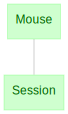

In [70]:
dj.Diagram(schema)

Remember, again, that after running the following method, you will be asked to confirm to commit the delete:

In [71]:
Session.drop()

[2025-01-02 15:50:12,505][INFO]: `tutorial`.`session` (0 tuples)
[2025-01-02 15:50:16,288][INFO]: Dropped table `tutorial`.`session`
[2025-01-02 15:50:16,295][INFO]: Tables dropped. Restart kernel.


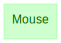

In [72]:
dj.Diagram(schema)

In [73]:
schema.drop()

# Summary

Congratulations! You have successfully created your first DataJoint pipeline, using dependencies to establish the link among the tables. You have also learned to query, fetch and delete the data.

In the next session, we will extend our data pipeline with tables to represent **imported data** and define new tables to **compute and hold analysis results**.


Please, continue to the next notebook `02-Calcium Imaging.ipynb`.